In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Sigmoid Function

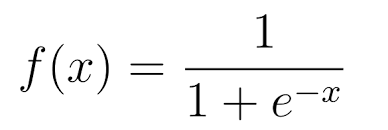

# Binary Cross Entropy

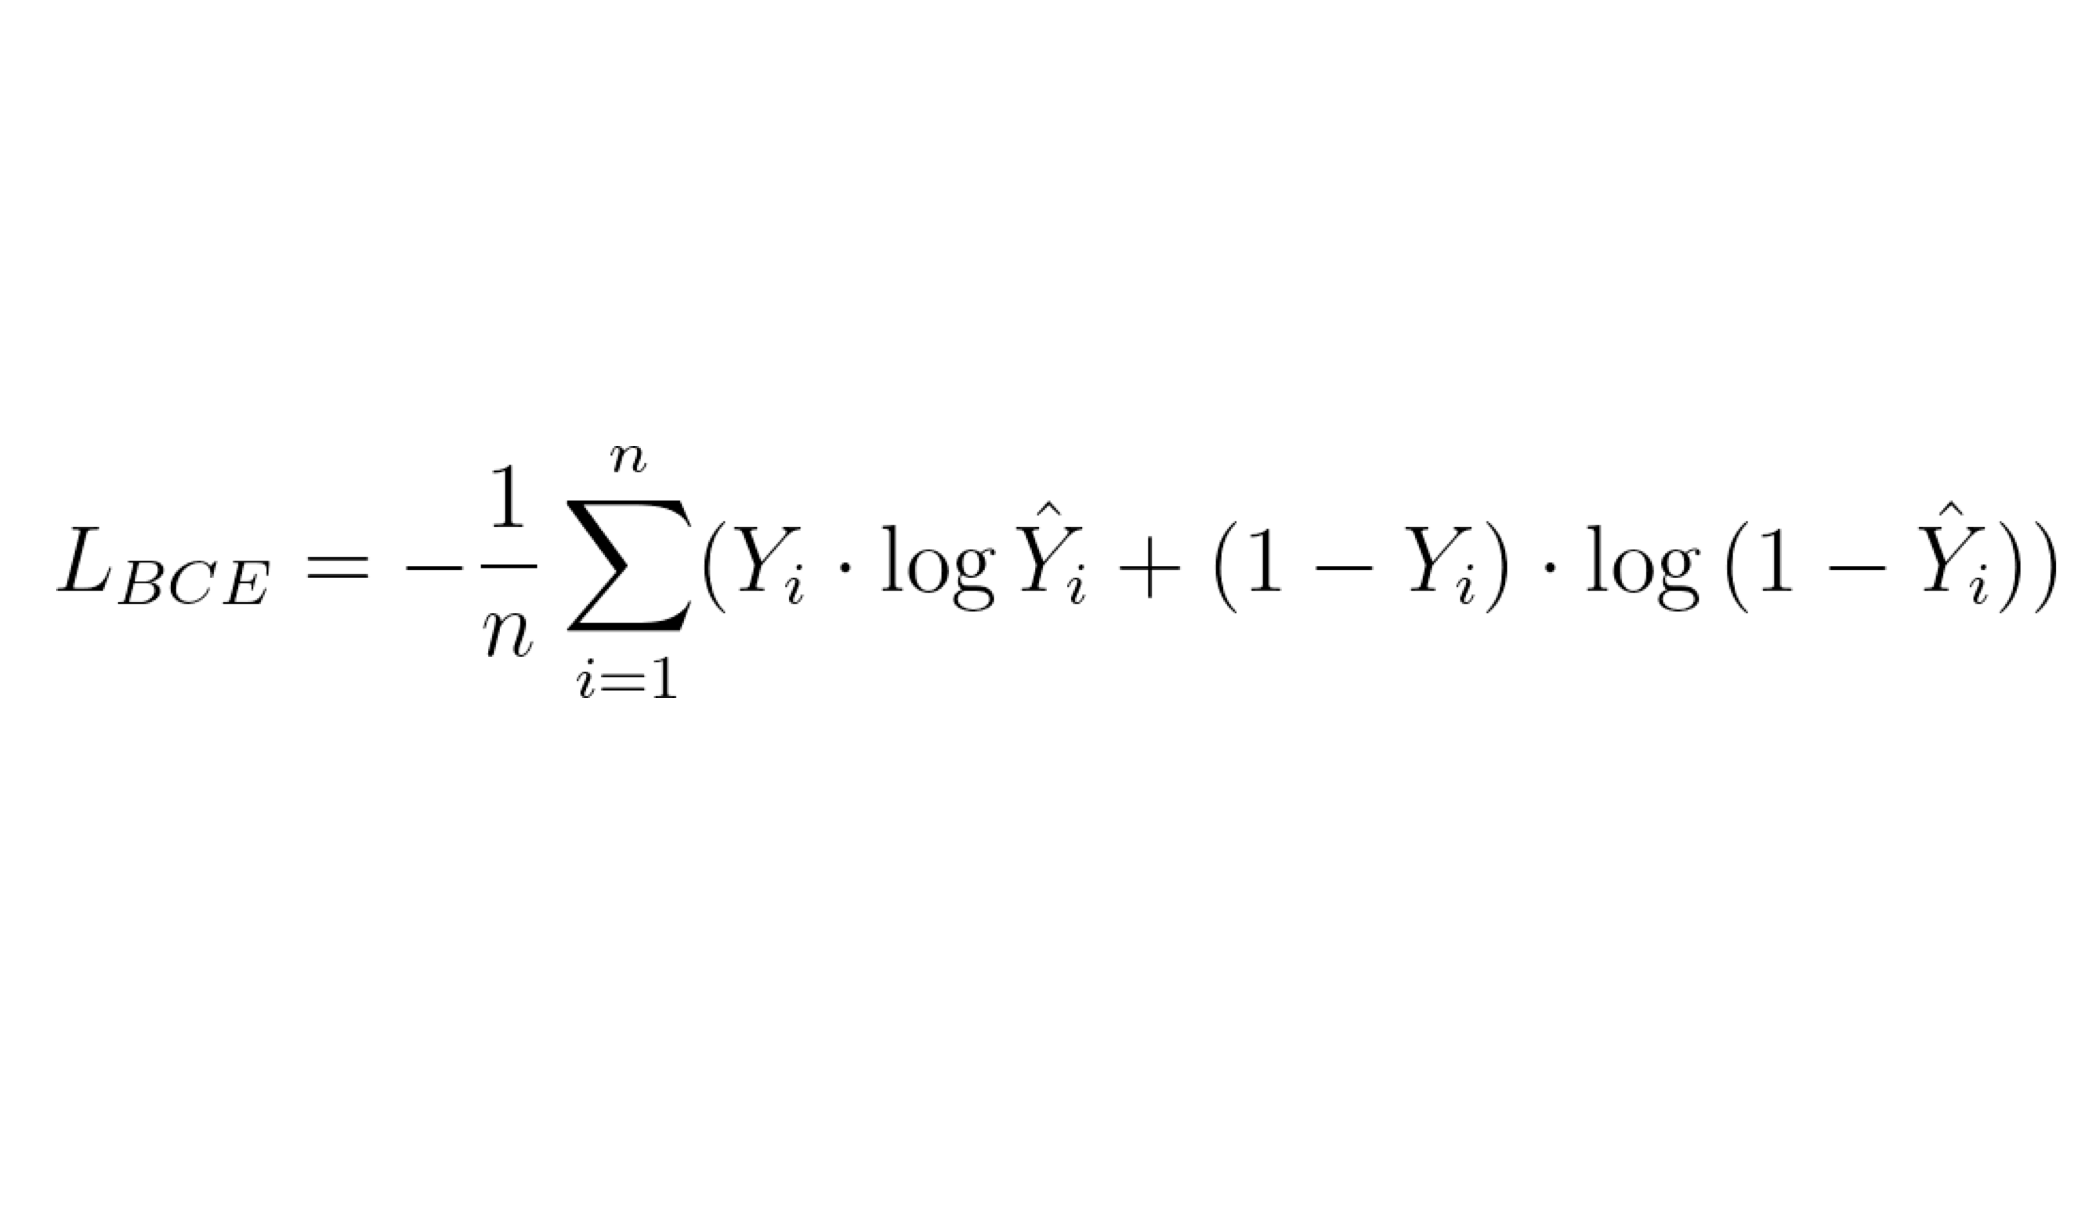

## Defining our logistic and loss functions *from scratch*

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def loss(yhat, y):
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat))

# Built in Data

In [ ]:
#loading the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# adding a column of ones to X for the bias term
'''
this code X gives the number of rows, filled with ones, it adds a column of ones to the left side of the array
'''
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [ ]:
z = np.array([[1, 2],
              [3, 4],
              [5, 6]])

z = np.hstack((np.ones((z.shape[0], 1)), z))

print(z)

[[1. 1. 2.]
 [1. 3. 4.]
 [1. 5. 6.]]


# Preprocessing of the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting our data into training and testing

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
#at first defining our parameters initially
#our weights takes the shape of the column in x
theta = np.random.randn(X_train.shape[1])

# Training

Gradient of Loss Function

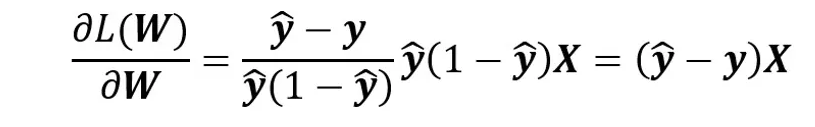


<code>yhat = x @ theta</code>

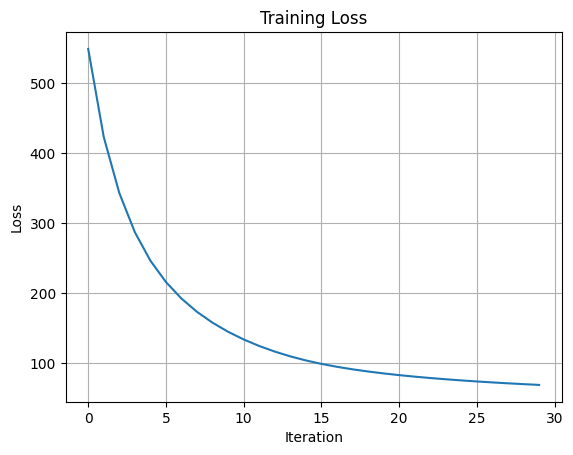

In [41]:
ls = []
lr = 1e-3
for i in range(30):
    # Loss
    yhat = sigmoid(X_train @ theta)
    l = loss(yhat, y_train)
    ls.append(l)

    # Gradient step: grad = dL/dtheta
    grad = X_train.T @ (yhat - y_train)
    theta -= lr * grad

plt.figure()
plt.plot(ls)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

# Prediction

In [52]:
y_test_pred = sigmoid(X_test @ theta)
prediction = (y_test_pred >= 0.5)
accuracy = np.sum((prediction == y_test)) / len(y_test)
print('Accuracy:', accuracy * 100, '%')

Accuracy: 97.36842105263158 %


# OOP

In [97]:
class LogisticRegression:
    def __init__(self, learning_rate=1e-3, num_iterations=30):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, yhat, y):
        return np.sum(-y * np.log(yhat) - (1 - y) * np.log(1 - yhat))

    def fit(self, X, y):
        self.weights = np.random.randn(X.shape[1])
        losses = []

        for _ in range(self.num_iterations):
            yhat = self.sigmoid(X @ self.weights)
            loss = self.loss(yhat, y)
            losses.append(loss)

            grad = X.T @ (yhat - y)
            self.weights -= self.learning_rate * grad

        return losses

    def predict(self, X):
        yhat = self.sigmoid(X @ self.weights)
        return (yhat >= 0.5).astype(int)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

Training Accuracy: 0.9604395604395605
Test Accuracy: 0.9912280701754386


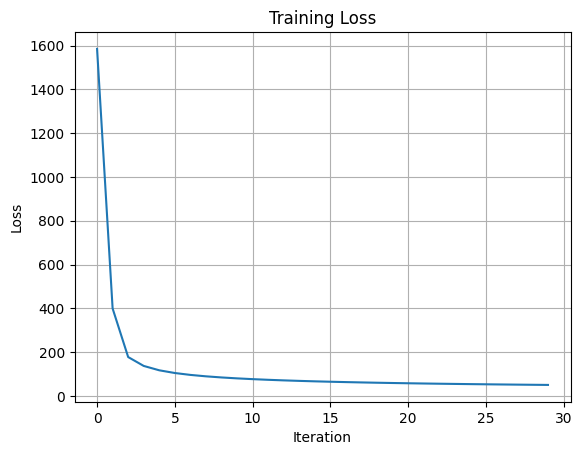

In [99]:
# object from our class
lr = LogisticRegression(learning_rate=1e-3, num_iterations=30)

# training and plotting the training loss
training_losses = lr.fit(X_train, y_train)

train_accuracy = lr.accuracy(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = lr.accuracy(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training loss
plt.figure()
plt.plot(training_losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

# Confusion Matrix (Extra)

In [100]:
#convert continuous targets to binary values